In this lab we will look at modeling an Ising system with Monte Carlo.
Most of the Python will be explained, but if you wanted practice, it can be found [here](https://www.learnpython.org/en/Basic_String_Operations). From the short turotials listed under Python basics, you are to be familiar with:
- Variables & Types
- Lists
- Basic Operators
- Conditions
- Loops
- Functions
- Classes & objects.

# Ising Model 

The Ising model is a lattice of $k$ interacting sites. Each site has a spin $\sigma_k$ which can have a value of +1 or -1. The spins are allowed to interact with their nearest-neighbor spins. The Hamiltonian for the system is given by:

$$
H(\sigma)=-\sum_{\langle i j\rangle} J_{i j} \sigma_{i} \sigma_{j}-\sum_{j} h_{j} \sigma_{j}
$$

where $\langle i j\rangle$ indicate a sum over only nearest neighbors. The interaction between spins is captured in $J$. If $J$, is positive the system will behave ferromagnetically while a negative $J$ favors antiferromagnetic interactions. a magnetific field is represented by $h_j$

We will start by introducing some code for this model. 

In [10]:
## think about umbrella sampling between points
## 1-D
## 2-D phase transitions. Given equations, but not derived in class. Expectd 1/2, but actual answer is 1/8th

To begin, we need to import the Python modules we will need. If you're not familiar with each of these, that is okay. 
- numpy allows us to perform the necessary math
- matplotlib will allows us to visualize our results
- pandas will help up tabulate data cleanly
- time will allow us to time the simulation
- pyblock handles reblocking, which will be discussed later in the notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyblock
import pandas as pd
import time

# Initializing the class
The Ising model class has been started for you. 
We have given you three functions to initialize the model parameters, print the parameters, and a visualize the model.
The functions are described within the functions as comments.
Multiline will surrounded by a set of triple quotation marks (''' comment '''), while single line comments are indicated by #.

If you are not familiar with Python classes, we suggest you review them with the source given above. The data for the model will be kept entirely in the class and the function we will write will be written to manipulate that data.

In [2]:
class IsingModel:
    """
    Store attributes of an Ising lattice model
    Provide abstractions to conveniently manipulate lattice for simulations
    """
    def __init__(self, M, N, J, h=0):
        """
        Initialization of the model.

        parameters:
            lattice is M by N sites
            M: size of first dimension
            N: size of second dimension
            J: interaction between neighbors (units: kT)
            h: background (external) field (units: kT)
        """
        # store parameters for convenience:
        #   energetic parameters
        self.J = J
        self.h = h

        #  size of lattice
        self.M = M
        self.N = N

        # We will store the lattice of spins as an M by N array of -1 or 1 to indicate what we refer to as down and up.
        # initialize each site as -1 or 1 with equal probability

        # The np.random.randint initializes random ints 
        # but does not include the high value so this initializes a 
        # matrix of -1 and 0's 
        lattice_state = np.random.randint(-1, high=1, size=(M, N))
        # then we change all the zeros to ones so we have a 
        # matrix of -1 and 1
        lattice_state[lattice_state == 0] = 1
        self.lattice_state = lattice_state
    
    def print_params(self):
        """
        Print lattice attributes
        """
        print("\t{:d} by {:d} lattice".format((self.M, self.N)))
        print("\tJ = {: 8.6f}   (positive means a favorable interaction)".format(self.J))
        print("\th = {: 8.6f}   (external field aligned with spins)".format(self.h))

    def plot_lattice(self):
        """
        Plot lattice configuration
        """
        plt.figure()

        imgplot = plt.imshow(self.lattice_state)
        imgplot.set_interpolation('none')

        plt.xticks(range(self.N))
        plt.yticks(range(self.M))

        for i in range(self.N+1):
            plt.plot([i-0.5, i-0.5], [0-0.5, self.M-0.5], color='black')
        for j in range(self.M+1):
            plt.plot([0-0.5, self.N-0.5], [j-0.5, j-0.5], color='black')

        plt.show()

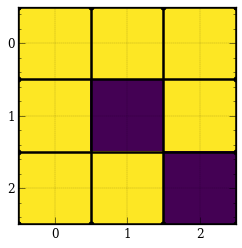

In [3]:
# Initializing a model of 3x3 spins, with J = 1 and h = 0
a = IsingModel(3, 3, 1.0, 0.0)
# visualize the lattice
a.plot_lattice()

## Question 1:
as a test initialize your own model of dimensions of  5 by 8. Set J = 2 and h = 1

In [4]:
# place code to initialize here
b = IsingModel(5, 8, 2.0, 3.0)
# we will test code here
assert b.M == 5
assert b.N == 8
assert b.J == 2
assert b.h == 3


## TODO: some test to call fo this function would be nice? 
print(b.lattice_state)

[[ 1  1  1  1 -1  1 -1 -1]
 [ 1 -1 -1 -1  1 -1  1 -1]
 [ 1  1 -1 -1 -1  1  1  1]
 [-1 -1 -1  1 -1 -1  1  1]
 [ 1 -1  1  1  1 -1 -1  1]]


## Coding functions for the model
Next, you will be coding your first function for the model. 

The functions we will need to create are: 
- the ability to flip a specific spin within the lattice
- the ability to go through each lattice site to calculate the energy of the lattice.
- a function to calculate the energy per site.



The way we will add functions to our class is to declare a class of the same name as the one we started before:

```python
class IsingModel(IsingModel):
```

then we can define a member function of the class to do whatever we want.
Remember, the first argument of a function with in a class is the argument `self`.
An example:

```python
 def function_name(self)
 ```
 
 
 We will first start with the function to flip (i.e. at a specific site in the lattice, $i, j$, the spin with flip and that lattice site will be the negative of itself.)


In [5]:
 class IsingModel(IsingModel):
    def flip_spin(self, i, j):
        """
        Flip spin (i, j)
        i.e. -1 ---> 1
              1 ---> -1
        """
        self.lattice_state[i, j] = - self.lattice_state[i, j]

The next function we want to write is the function to estimate the energy of the entire lattice.
One thing that will affect our 

# Describe periodic boundary conditions 

# expression for energy of a given lattice state

# Example on how to access the python object lattice_state

In [7]:
  class IsingModel(IsingModel):
    def calculate_energy_of_sites(self, i, j):
        """
        Calculate energy of spin (i, j)
        
        Periodic boundary conditions implemented
        """
        spin_here = self.lattice_state[i, j]  # value of spin here
        
        # value of spin above, below, left, and right of spin (i, j)
        # for each, if on boundary, we wrap around to the other side
        # of the lattice for periodic boundary conditions
        if j == 0:
            spin_above = self.lattice_state[i, self.N - 1]
        else:
            spin_above = self.lattice_state[i, j - 1]
        
        if j == self.N - 1:
            spin_below = self.lattice_state[i, 0]
        else:
            spin_below = self.lattice_state[i, j + 1]
            
        if i == self.M - 1:
            spin_right = self.lattice_state[0, j]
        else:
            spin_right = self.lattice_state[i + 1, j]
        
        if i == 0:
            spin_left = self.lattice_state[self.M - 1, j]
        else:
            spin_left = self.lattice_state[i - 1, j]
        
        return - self.h * spin_here - self.J * spin_here *\
            (spin_above + spin_below + spin_left + spin_right)

In [8]:
## add test here for correct behavior

In [9]:
# desribe what we want from them here in the next code block

In [10]:
  class IsingModel(IsingModel):
    def calculate_lattice_energy_per_spin(self):
        """
        Calculate energy of lattice normalized by the number of spins
        """
        E = 0.0
        for i in range(self.M):
            for j in range(self.N):
                E += self.calculate_energy_of_spin(i, j)
        # factor of two for overcounting neighboring interactions.
        # but then need to add back -1/2 h \sum s_i 
        return E / 2.0 / (self.M * self.N) -\
            self.h * np.sum(self.lattice_state) / 2.0 / (self.M * self.N)

In [11]:
# test code here

# Monte Carlo Simulations

Theoretically, we have made a very simple model for describing interacting systems. 
Additionally, we can now start to use this model for predicting observables. 
For example, for the expectation value of the energy of an $M*N$ lattice, the expectation value would be

$$
\langle E\rangle=\sum_{\alpha} E(\alpha) P(\alpha)
$$

where $E(\alpha)$ is the energy of a fixed state $\alpha$, and  $P(\alpha)$ is the probability of being in that fixed state.
However, the number of fixed states grows as $2^{(N*M)}$ where $N*M$ is the total number of lattice points.
This quickly becomes impractical as the lattice size grows.

To deal with this, we use Monte Carlo sampling to sample states $\alpha$ with probability $P(\alpha)$.

In [12]:
# Initialize class
class Calculation:
    def __init__(self, ising_model, kT=1, num_equil_sweeps=1000, num_sweeps=1000):
        """
        Initializing
        """
        self.num_equil_sweeps = num_equil_sweeps
        self.num_sweeps = num_sweeps
        self.kT = kT
        self.ising_model = ising_model
        self.energies_list = []
        self.total_spin_list = []

In [13]:
class Calculation(Calculation):
    def sweep(self):
        for site_i in range(self.ising_model.M):
            for site_j in range(self.ising_model.N):
                E_old = self.ising_model.calculate_energy_of_site(site_i, site_j)
                # flip spin i and j
                self.ising_model.flip_spin(site_i, site_j)
                # calculate updated energy
                E_new = self.ising_model.calculate_energy_of_site(site_i, site_j)
                # Monte Carlo step
                if np.random.random() <= np.exp(-(E_new - E_old) / self.kT):
                    # accept move
                    E_old = E_new
                else:
                    # reject move
                    # flip spin i and j back
                    self.ising_model.flip_spin(site_i, site_j)


In [14]:
class Calculation(Calculation):
    def record_observables(self):
        # calculate total energy
        e = self.ising_model.calculate_total_energy_per_spin()
        self.energies_list.append(e)

        # calculate total s2
        s = self.ising_model.calculate_total_spin_per_spin()
        self.total_spin_list.append(s)

In [25]:
class Calculation(Calculation):
    def get_average_energy(self):
        return np.mean(self.energies_list)

    def get_stderr_energy(self):
        return npd.std(self.energies_list) / np.sqrt(self.num_sweeps)

    def get_average_spin(self):
        return np.mean(self.total_spin_list)

    def get_stderr_spin(self):
        return np.std(self.total_spin_list) / np.sqrt(self.num_sweeps)
    
    def get_reblocked_avg_stderr_energy(self):
        reblock_data = pyblock.blocking.reblock(np.array(self.energies_list))
        opt = pyblock.blocking.find_optimal_block(self.num_sweeps, reblock_data)
        reblocked_data = reblock_data[opt[0]]
        return reblocked_data.mean, reblocked_data.std_err
    
    def get_reblocked_avg_stderr_spin(self):
        reblock_data = pyblock.blocking.reblock(np.array(self.total_spin_list))
        opt = pyblock.blocking.find_optimal_block(self.num_sweeps, reblock_data)
        if np.isnan(opt[0]):
            # reblocked_data = reblock_data[-1]
            # return reblocked_data.mean, reblocked_data.std_err
            means = []
            start = 0
            end = len(self.total_spin_list) // 5

            for i in range(4):
                means.append(np.mean(self.total_spin_list[start:end]))
                start = end
                end = start + len(self.total_spin_list) // 5
            means.append(np.mean(self.total_spin_list[end::]))
            return np.mean(means), np.std(means) / np.sqrt(len(means))
        else:
            reblocked_data = reblock_data[opt[0]]
            return reblocked_data.mean, reblocked_data.std_err


In [26]:
class Calculation(Calculation):
    def run_calculation(self):
        for sweep in range(self.num_equil_sweeps):
            self.sweep()
        for sweep in range(self.num_sweeps):
            self.sweep()
            self.record_observables()

# Applications of the class

1) Run an Ising model simulation with the following parameters:

Again, we initialize the python class as: `our_model = IsingModel(n, m, J, h)`

- finite size effects: studying two different lattice sizes
    - what differences do you notice at 10x10 and 30x30
- finding the transition temperature
    - distributions of spins above and below
- Standard deviation changes around phase transitions
- with and without magnetic field

We will be comparing our simulation to that of the analytical result. The analytical result is defined as:



In [27]:
def analytical(x, J):
    analytical_solution = []
    for i in x:
        if i < 2.269:
            analytical_solution.append(
                (1 - np.sinh((2 * J) / i) ** (-4)) ** (1.0 / 8.0)
            )
        else:
            analytical_solution.append(0)

    return analytical_solution

we want to look at a range of $kT$ values. We will look at a set of values to do our simulation, and a finer mesh of points to calculate the analytical solution since that is a quick calculation.

The `np.arange` function generates a list of numbers with a certain spacing between the values. The function takes three arguments, The first argument is the number you want to start with, the second argument is the number you want to finsih your list of numbers on, the third argument is the spacing between the numbers

In [28]:
analyticlal_kT_list = np.arange(1.2, 3.0, 0.001)
simulation_kT_list = np.arange(1.2, 3.0, 0.1)

In [29]:
avg_s_list = []
stderr_s_list = []
n = 10
m = 10
J = 1
h = 0.00
num_equil=100
num_sample=1500
s_analytical = analytical(analytical_kT_list, J)
a = IsingModel(n, m, J, h)


NameError: name 'analytical_kT_list' is not defined

In [30]:
for kT in simulation_kT_list:
    a2 = Calculation(a, kT=kT, num_equil_sweeps=num_equil, num_sweeps=num_sample)
    # a2 = Wolff_Calculation(a, kT=kT, num_equil_sweeps=2000,num_sweeps= 1000)
    a2.run_calculation()
    mean, std_err = a2.get_reblocked_avg_stderr_spin()
    print("kT={}    {}    {}".format(kT,mean,std_err))
    
    avg_s_list.append(np.abs(mean))
    stderr_s_list.append(std_err)
    s = a2.total_spin_list
    fig, ax = plt.subplots(tight_layout=True)
    fig.set_size_inches(8,5)
    n_bins = 25
    bins = np.linspace(-1,1,n_bins)
    ax.hist(s, bins=bins)
    ax.set_title("kT={:>4.2f} n={:>02d}, m={:>02d}, J={:>4.2f}, h={:>4.2f} samp={}".format(kT, n, m, J, h, num_sample))
    ax.set_xlim(-1.1,1.1)
    plt.tight_layout()
    plt.savefig(
        "metropolis_s_hist_kT_{:4.2f}_n_{:>02d}_m_{:>02d}_J_{:>4.2f}_h_{:>4.2f}_samp_{}.png".format(
            kT, n, m, J, h, num_sample
        ),
        dpi=300,
    )
    # plt.show()
    s = pd.Series(s)
    print("avg s autocorr = {}".format(s.autocorr()))
plt.figure(figsize=(8,5))
plt.errorbar(kT_list, avg_s_list, stderr_s_list, label="avg S")
plt.plot(plot_kT_list, s_analytical, label="analytical")
plt.title("n={:>02d}, m={:>02d}, J={:>4.2f}, h={:>4.2f} samp={}".format(n, m, J, h, num_sample))

plt.legend()
plt.tight_layout()
plt.savefig(
    "metropolis_avg_s_n_{:>02d}_m_{:>02d}_J_{:>4.2f}_h_{:>4.2f}_samp_{}.png".format(n, m, J, h, num_sample),
    dpi=300,
)
#plt.show()

AttributeError: 'IsingModel' object has no attribute 'calculate_energy_of_site'

### References:

code: 
    
theory: https://arxiv.org/pdf/0803.0217.pdf